<a href="https://colab.research.google.com/github/Allison-Lin/BigData/blob/master/1022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
install.packages("ggplot2")  ##安裝套件
install.packages("SportsAnalytics")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
library(SportsAnalytics)   ##載入套件
library(ggplot2)

In [9]:
NBA1516<-fetch_NBAPlayerStatistics("15-16") #讀入資料

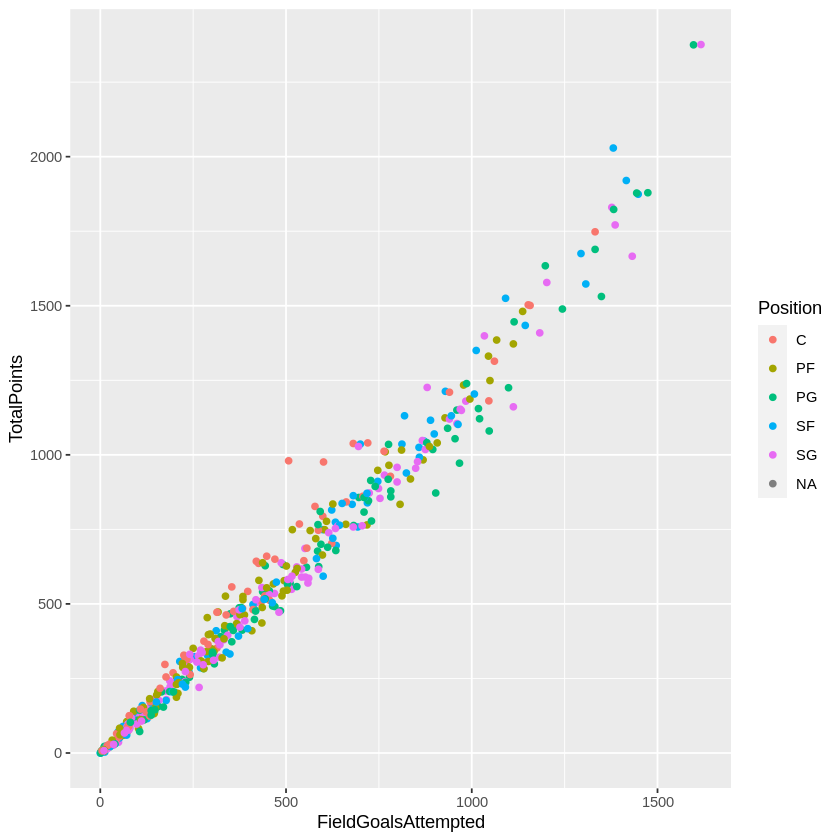

In [11]:
qplot(FieldGoalsAttempted,TotalPoints,data=NBA1516,color=Position) #製作散佈圖 qplot(x軸名稱,y軸名稱,data=使用資料)

In [13]:
str(NBA1516)

'data.frame':	476 obs. of  25 variables:
 $ League             : Factor w/ 1 level "NBA": 1 1 1 1 1 1 1 1 1 1 ...
 $ Name               : chr  "Quincy Acy" "Jordan Adams" "Steven Adams" "Arron Afflalo" ...
 $ Team               : Factor w/ 31 levels "ATL","BOS","BRO",..: 27 15 22 20 19 13 28 26 12 15 ...
 $ Position           : Factor w/ 5 levels "C","PF","PG",..: 4 5 1 5 1 1 2 2 2 5 ...
 $ GamesPlayed        : int  59 2 80 71 59 60 74 9 79 64 ...
 $ TotalMinutesPlayed : int  877 15 2019 2359 863 802 2260 37 1601 1622 ...
 $ FieldGoalsMade     : int  119 2 261 354 150 134 536 5 191 215 ...
 $ FieldGoalsAttempted: int  214 6 426 799 314 225 1045 10 370 469 ...
 $ ThreesMade         : int  19 0 0 91 0 0 0 0 0 15 ...
 $ ThreesAttempted    : int  49 1 0 238 1 0 16 0 0 42 ...
 $ FreeThrowsMade     : int  50 3 114 110 52 60 259 0 46 90 ...
 $ FreeThrowsAttempted: int  68 5 196 131 62 84 302 0 73 138 ...
 $ OffensiveRebounds  : int  65 0 218 23 75 86 175 2 162 104 ...
 $ TotalRebounds      : 

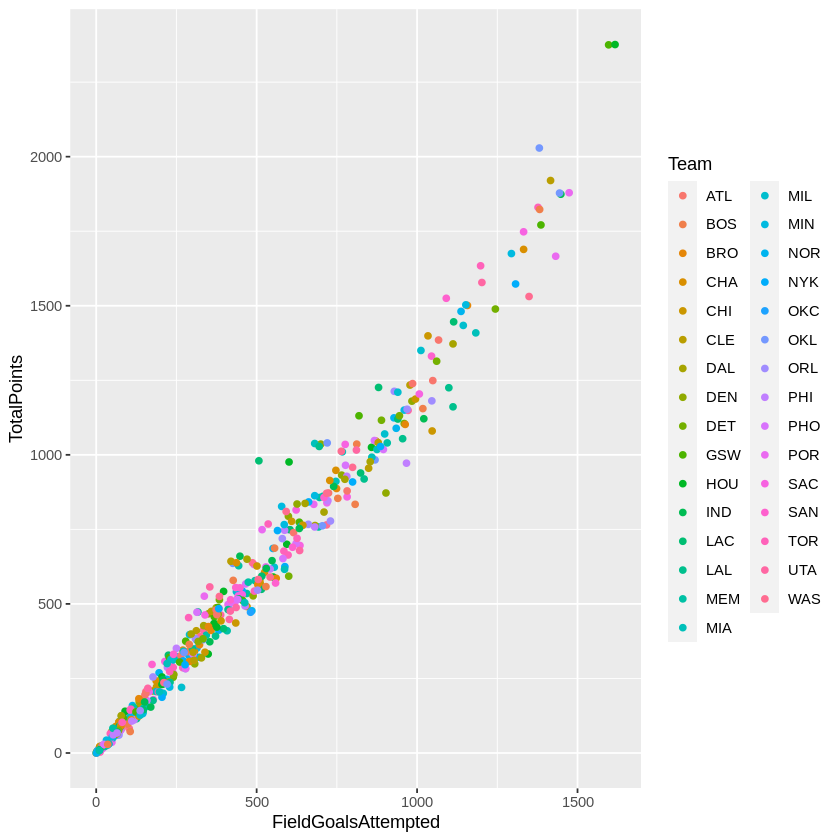

In [16]:
qplot(FieldGoalsAttempted,TotalPoints,data=NBA1516,color=Team) #製作散佈圖 qplot(x軸名稱,y軸名稱,data=使用資料)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



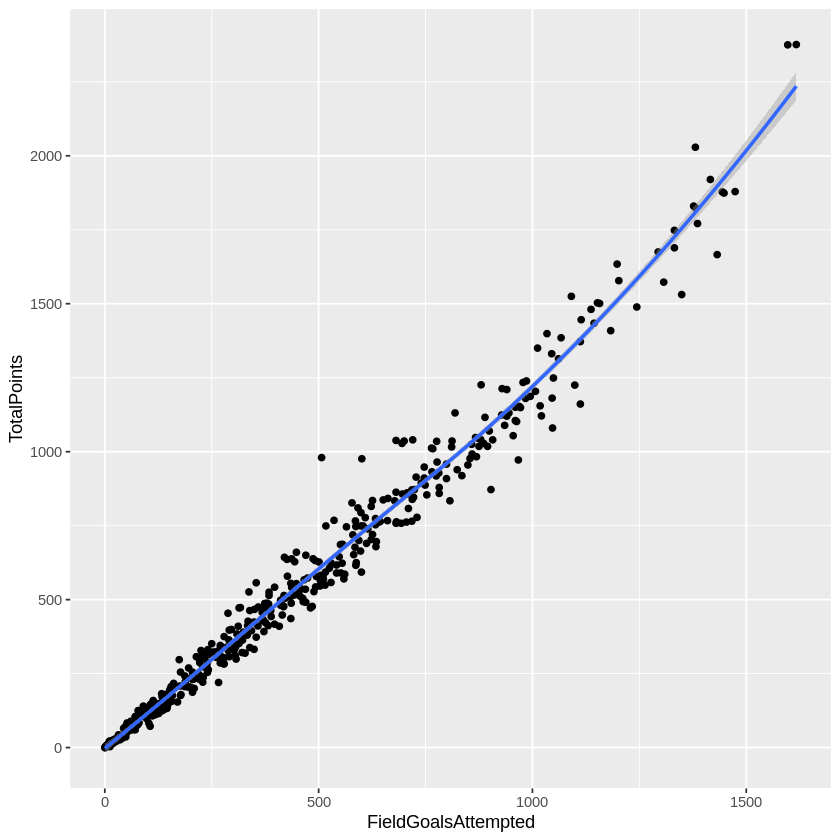

In [17]:
qplot(FieldGoalsAttempted,TotalPoints,data=NBA1516,geom=c("point","smooth")) ##加點與漸進線

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



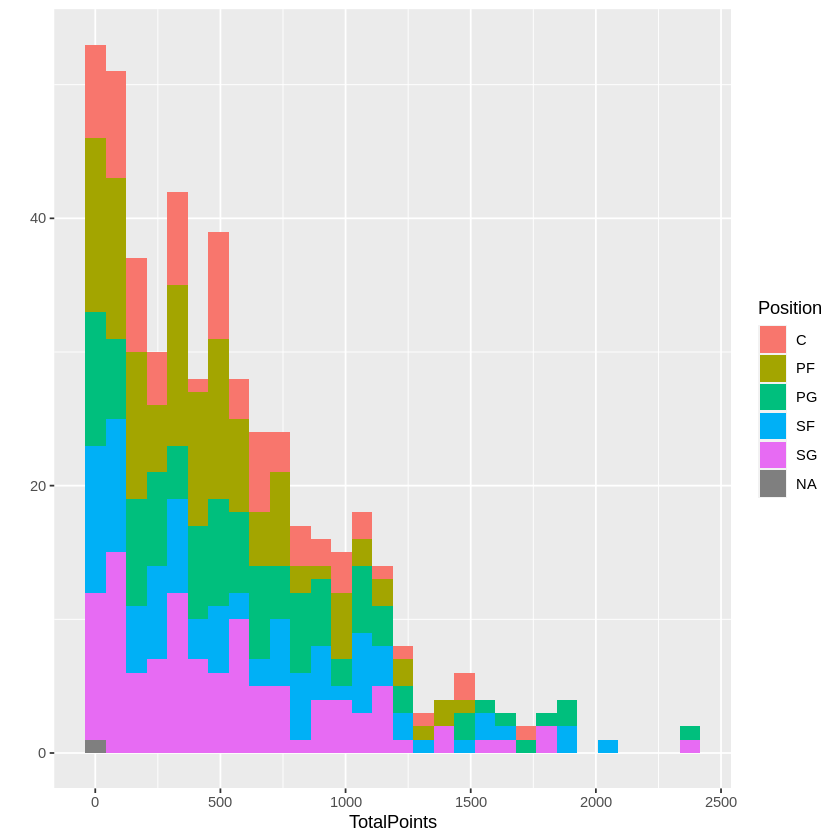

In [20]:
#畫TotalPoints的直方圖 / fill=Position 並用守備位置Position著色
qplot(TotalPoints,data=NBA1516,fill=Position)

Warning message:
“Ignoring unknown parameters: binwidth”


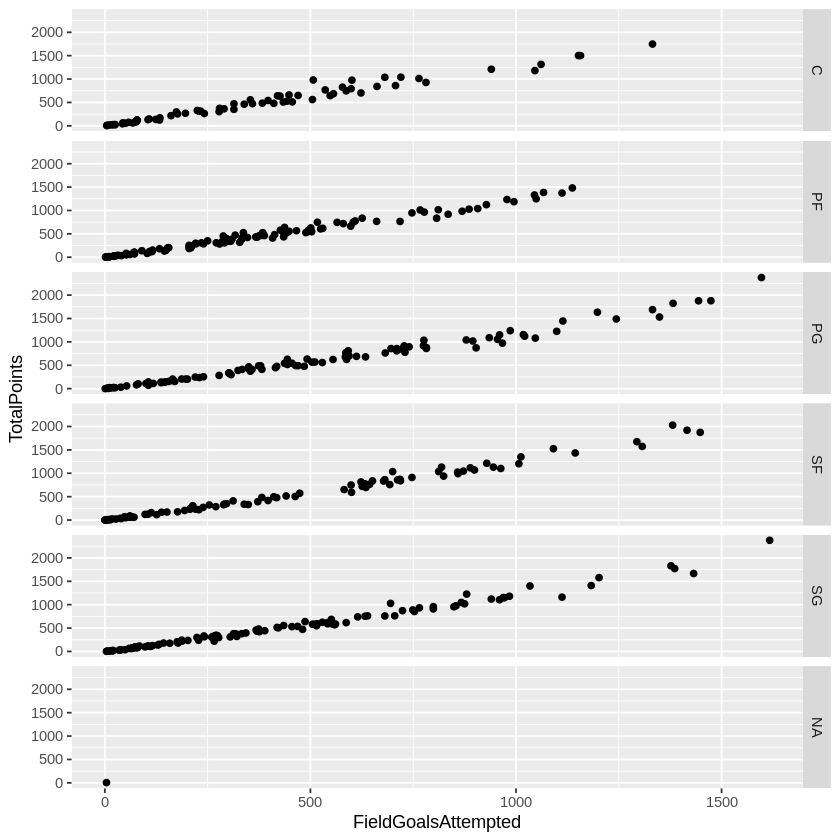

In [36]:
#facets=Position~. 用守備位置Position分群畫圖(橫向)     #binwidth=10 每10分一組  
qplot(FieldGoalsAttempted,TotalPoints,data=NBA1516,facets=Position~. ,binwidth = 10)

Warning message:
“Ignoring unknown parameters: binwidth”


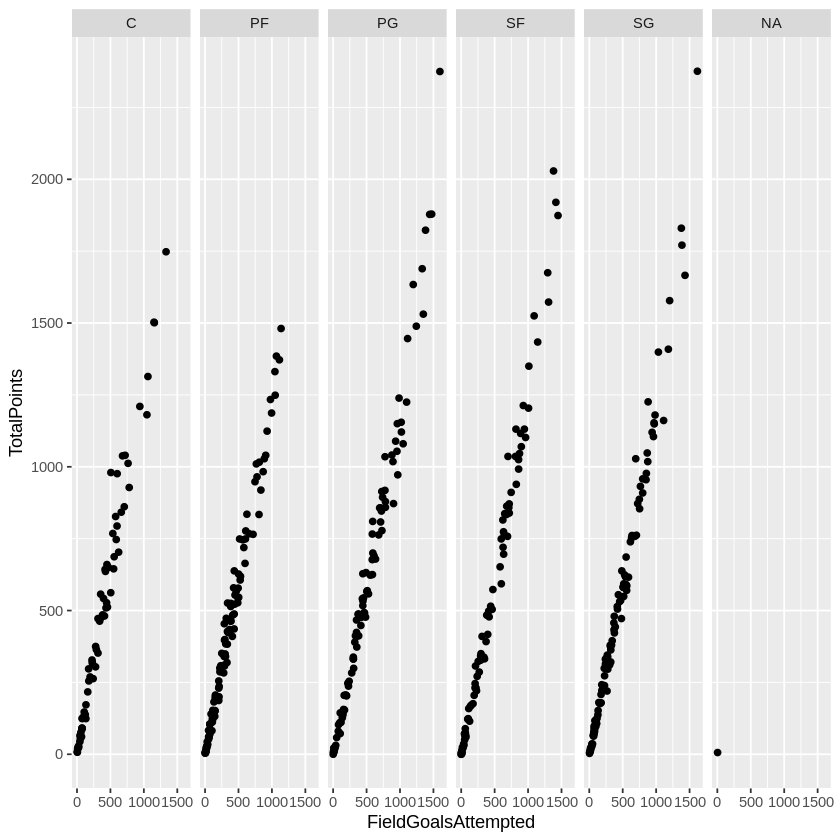

In [40]:
#facets=.~Position 用守備位置Position分群畫圖(直向)
qplot(FieldGoalsAttempted,TotalPoints,data=NBA1516,facets=.~Position,binwidth = 100)

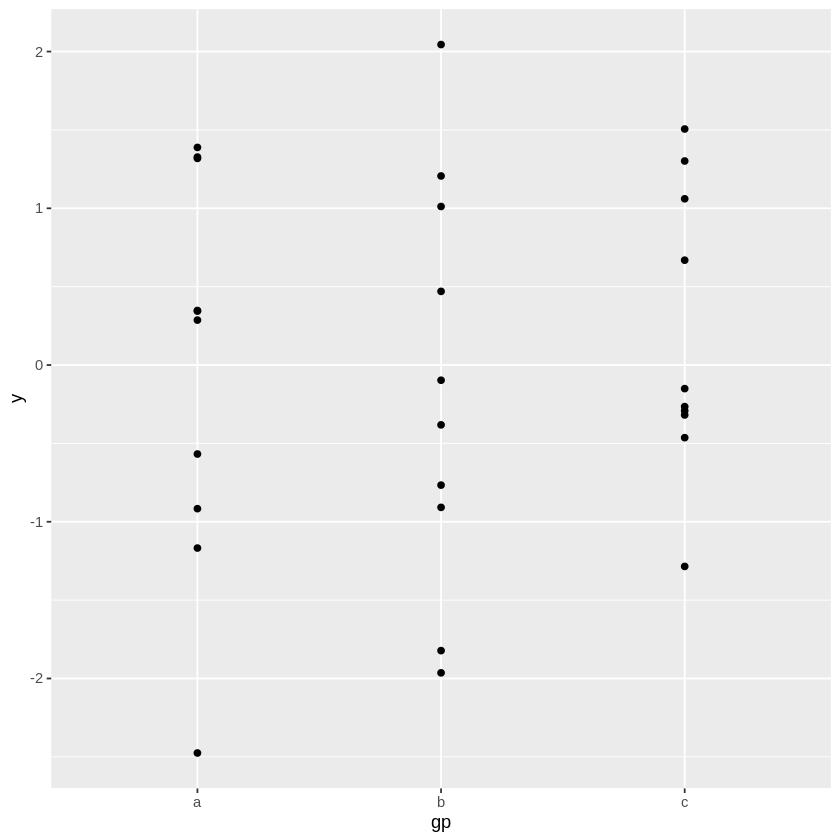

In [42]:
df<-data.frame(gp=factor(rep(letters[1:3],each=10)),y=rnorm(30))
ggplot(df,aes(x=gp,y=y))+geom_point()

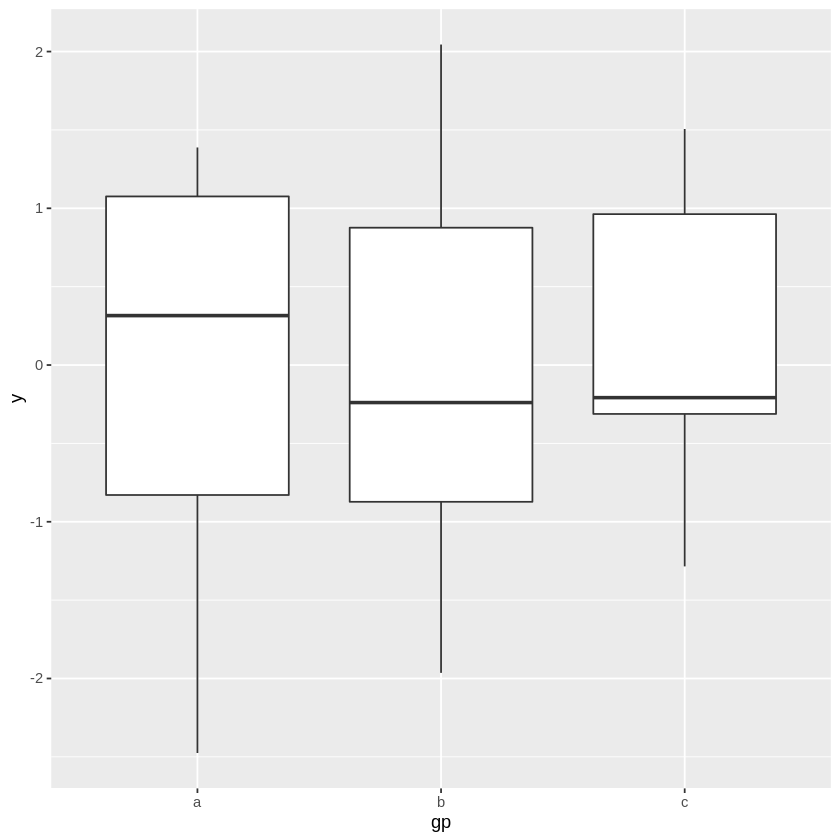

In [43]:
#用geom_boxplot()改畫盒狀圖
ggplot(df,aes(x=gp,y=y))+geom_boxplot()

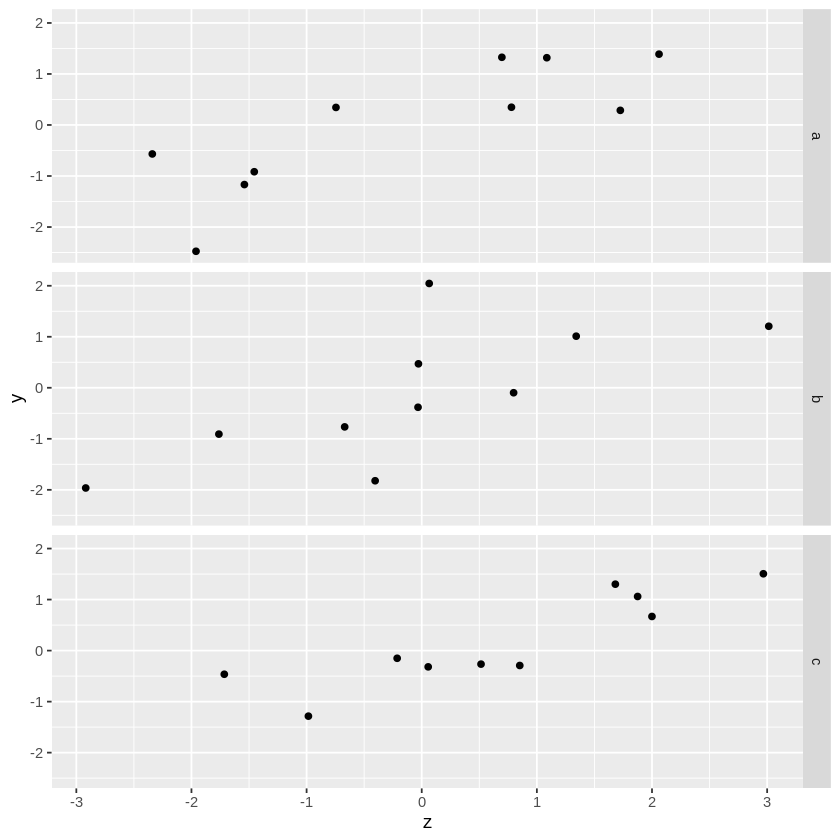

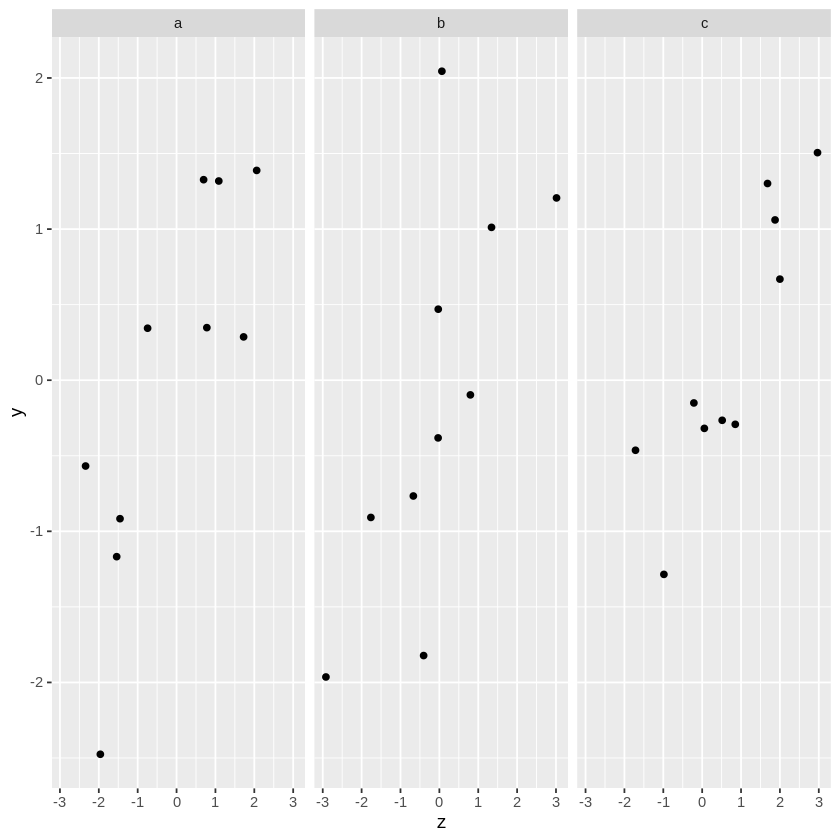

In [46]:
df$z<-df$y+rnorm(30)
#橫切/直切
ggplot(df,aes(x=z,y=y))+geom_point()+facet_grid(gp~.)
ggplot(df,aes(x=z,y=y))+geom_point()+facet_grid(.~gp)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



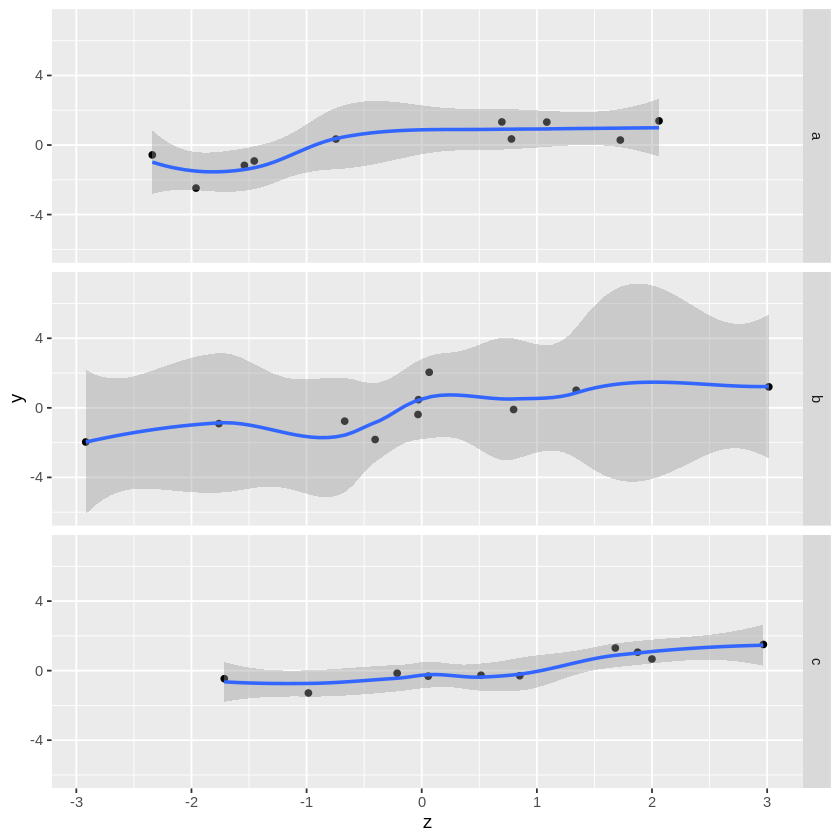

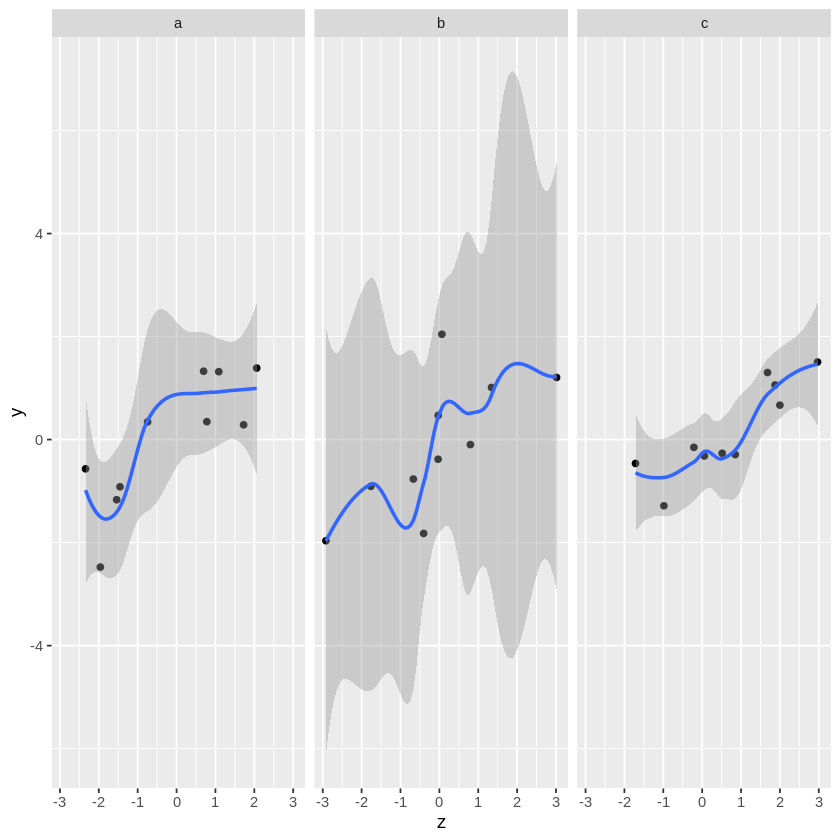

In [47]:
#加上趨勢線geom_smooth()
ggplot(df,aes(x=z,y=y))+geom_point()+facet_grid(gp~.)+geom_smooth()
ggplot(df,aes(x=z,y=y))+geom_point()+facet_grid(.~gp)+geom_smooth()

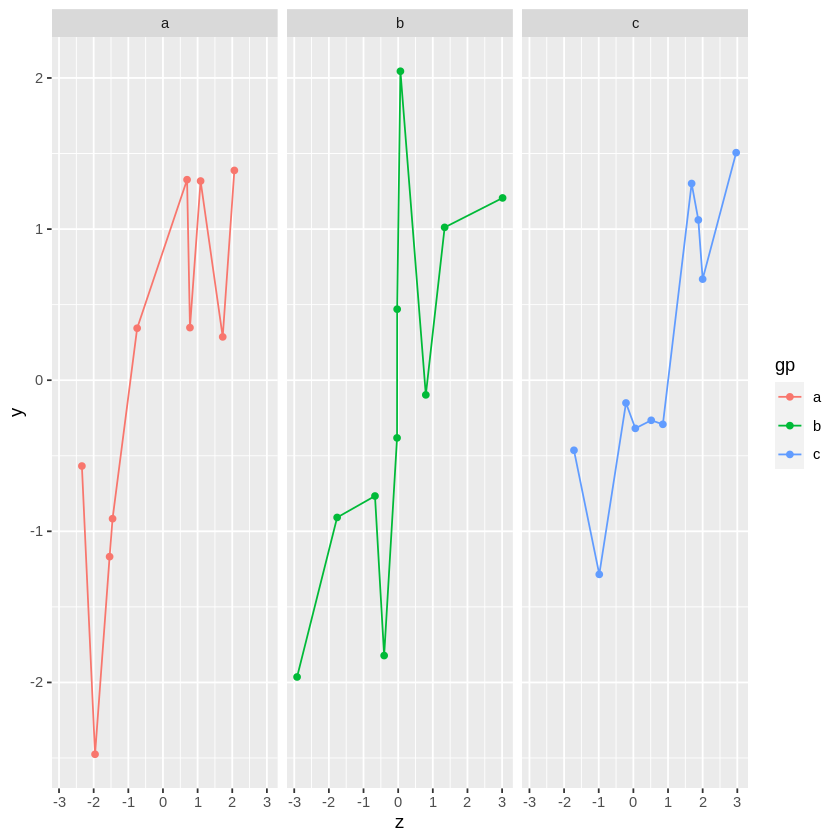

In [49]:
#用geom_line()畫線，加上顏色aes(color=gp)
ggplot(df,aes(x=z,y=y,color=gp))+geom_point()+facet_grid(.~gp)+geom_line()

In [50]:
install.packages("datasets")
install.packages("data.table")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [51]:
library(datasets)
library(data.table)

In [53]:
airquality$Month<-as.factor(airquality$Month) #將Month轉為因子變項
airquality.mean<-data.table(airquality)[,.(OzoneMean=mean(Ozone,na.rm=T)),by=Month] #計算每月Ozone平均

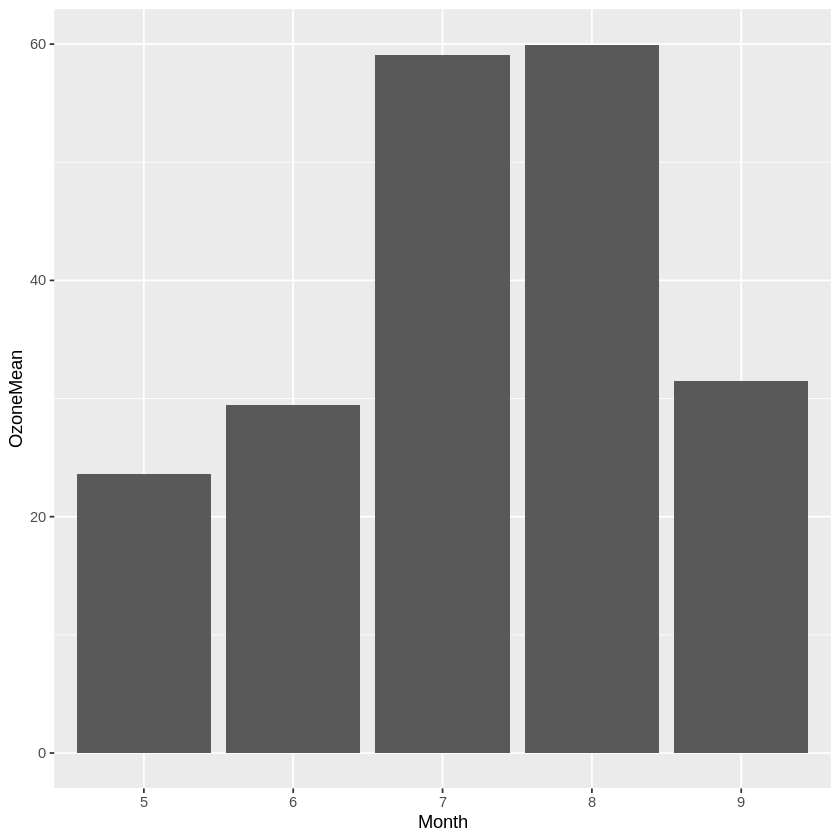

In [54]:
ggplot()+geom_bar(data=airquality.mean,aes(x=Month,y=OzoneMean),stat="identity") #stat="identity"直接畫數字